In [2]:
import pandas as pd
import numpy as np
from sklearn import * 

%matplotlib inline

In [3]:
df = pd.read_csv("/data/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
y = df.charges

In [5]:
X = df.iloc[:, :-1]
X.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [10]:
X = pd.get_dummies(X, drop_first=True)

In [11]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.3, 
                                                                   random_state = 1)

In [12]:
est = linear_model.LinearRegression()
est.fit(X_train, y_train) # learning the values of parameters ... thatas
y_test_pred = est.predict(X_test) # preiction

In [13]:
result = pd.DataFrame({"actual": y_test, "predicted": y_test_pred})

In [14]:
result.head()

,actual,predicted
559,1646.4297,4610.315541
1087,11353.2276,12887.893880
1020,8798.5930,12573.948752
460,10381.4787,13197.836626
802,2103.0800,629.337182


In [15]:
result["residual"] = result.actual - result.predicted
result.head()

,actual,predicted,residual
559,1646.4297,4610.315541,-2963.885841
1087,11353.2276,12887.893880,-1534.666280
1020,8798.5930,12573.948752,-3775.355752
460,10381.4787,13197.836626,-2816.357926
802,2103.0800,629.337182,1473.742818


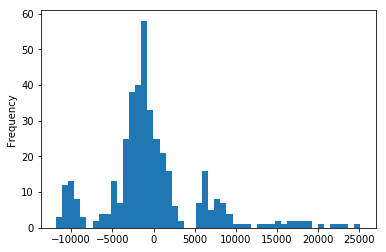

In [16]:
result.residual.plot.hist(bins = 50)

In [17]:
SSE = np.sum(result.residual ** 2)

In [18]:
MSE = SSE / result.shape[0]
MSE

36761456.35201325

In [19]:
RMSE = np.sqrt(MSE)
RMSE

6063.12265685045

In [20]:
np.std(y_test)

11904.481211649017

In [21]:
SST = np.sum((np.mean(y_train) - y_test) ** 2)

In [22]:
SSE / SST

0.2594002695488972

In [24]:
R2 = 1 - SSE / SST
R2

0.7405997304511027

In [25]:
metrics.mean_squared_error(y_test, y_test_pred)

36761456.35201325

In [26]:
metrics.r2_score(y_test, y_test_pred)

0.7405989316927212

In [27]:
SST = np.sum((np.mean(y_test) - y_test) ** 2)
R2 = 1 - SSE / SST
R2

0.7405989316927213

In [28]:
est.intercept_, est.coef_

(-11039.238418561546,
 array([  251.68186515,   322.38910684,   344.9642553 ,  -282.79634661,
        24059.39047692,  -304.09009765,  -939.34209691,  -868.18855866]))

In [29]:
pd.DataFrame({"feature": X.columns, "coef": est.coef_})

,coef,feature
0,251.681865,age
1,322.389107,bmi
2,344.964255,children
3,-282.796347,sex_male
4,24059.390477,smoker_yes
5,-304.090098,region_northwest
6,-939.342097,region_southeast
7,-868.188559,region_southwest


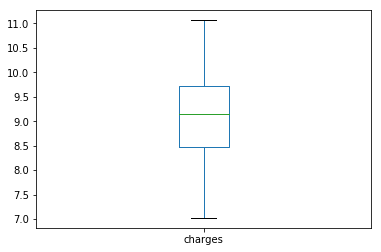

In [36]:
np.log(df.charges).plot.box()

In [39]:
X.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0


In [41]:
target = "charges"
y = np.log(df[target])
X = df.copy()
del X[target]
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                            test_size = 0.3, random_state = 1)
pipe = pipeline.Pipeline([
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LinearRegression())
])

pipe.fit(X_train, y_train)
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

print("Training MSE", metrics.mean_squared_error(y_train, y_train_pred),
     "\nTesting MSE", metrics.mean_squared_error(y_test, y_test_pred),
     "\nTraining R2", metrics.r2_score(y_train, y_train_pred),
     "\nTesting R2", metrics.r2_score(y_test, y_test_pred)) 


Training MSE 0.20407164987815382 
Testing MSE 0.17881132833282085 
Training R2 0.7589104330619343 
Testing R2 0.78742951961976


In [47]:
scaler = preprocessing.StandardScaler()
scaler.fit(X)
pd.DataFrame(scaler.transform(X), columns=X.columns)

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,-0.908614,-1.010519,1.970587,-0.566418,-0.611324,1.765481
1,-1.509965,0.509621,-0.078767,0.989591,-0.507463,-0.566418,1.635795,-0.566418
2,-0.797954,0.383307,1.580926,0.989591,-0.507463,-0.566418,1.635795,-0.566418
3,-0.441948,-1.305531,-0.908614,0.989591,-0.507463,1.765481,-0.611324,-0.566418
4,-0.513149,-0.292556,-0.908614,0.989591,-0.507463,1.765481,-0.611324,-0.566418
5,-0.584350,-0.807656,-0.908614,-1.010519,-0.507463,-0.566418,1.635795,-0.566418
6,0.483668,0.455486,-0.078767,-1.010519,-0.507463,-0.566418,1.635795,-0.566418
7,-0.157143,-0.479567,1.580926,-1.010519,-0.507463,1.765481,-0.611324,-0.566418
8,-0.157143,-0.136714,0.751079,0.989591,-0.507463,-0.566418,-0.611324,-0.566418
9,1.480485,-0.791252,-0.908614,-1.010519,-0.507463,1.765481,-0.611324,-0.566418
